In [51]:
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
(x_train , y_train) , (x_test,  y_test) = mnist

## 檢視資料

In [10]:
# 檢視data shape
# **若是data的量不一樣，訓練時會出現錯誤**
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
# 檢視y_train的第一筆資料
y_train[0]

5

In [12]:
# x_train的第一筆
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## 修飾資料

In [13]:
# 把x_train的rgb數值壓縮成0~1之間
# 用意為加快運算速度
x_train_normal = x_train/255.0 
x_test_normal = x_test/255.0


In [24]:
# one hot encoding
# Converts a class vector (integers) to binary class matrix.
# 先簡單代過，之後再詳細介紹onehot encoding
# 這邊做onehot encoding 的用意為把數字0~9變成陣列
# 假設 
"""
數字為0，即輸出[1,0,0,0,0,0,0,0,0,0]
數字為1，即輸出[0,1,0,0,0,0,0,0,0,0]
數字為2，即輸出[0,0,1,0,0,0,0,0,0,0]
.
.
.
.
數字為9，即輸出[0,0,0,0,0,0,0,0,0,1]
"""

y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [25]:
# 檢視y_train的第一筆
y_train[0]

5

In [26]:
# 檢視y_train_onehot的第一筆
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 建立模型

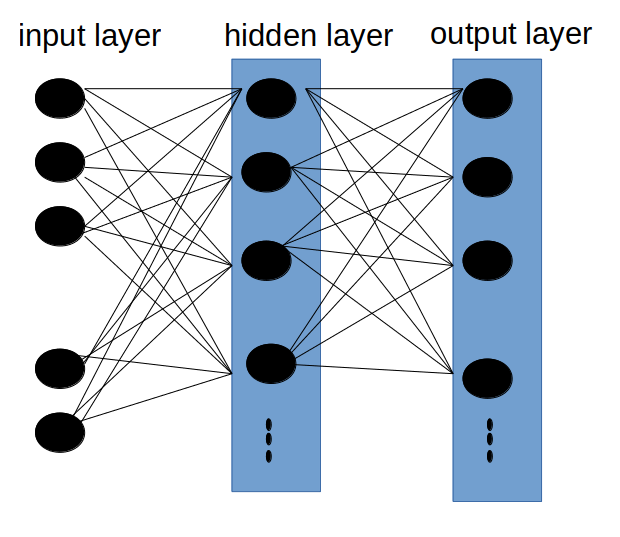

In [28]:
"""
Dense 為完全連接

"""
        # 建立model，可以把他先想像成，製作一個蛋糕
        # Sequential 把他當成蛋糕的底座，一個model需要一個底座
model = tf.keras.models.Sequential([
        # Flatten展平層 可以這麼想 -> 把輸入數據攤平
        tf.keras.layers.Flatten(input_shape = (28,28),),
        # 這一層為隱藏層(hidden)有128個神經元(neuron)
        tf.keras.layers.Dense(128 , activation = 'relu'),
        # **多分類**的啟動函數為softmax
        # **二分類**的啟動函數sigmoid
        tf.keras.layers.Dense(10 , activation = 'softmax')
])

In [29]:
# 檢視模型
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


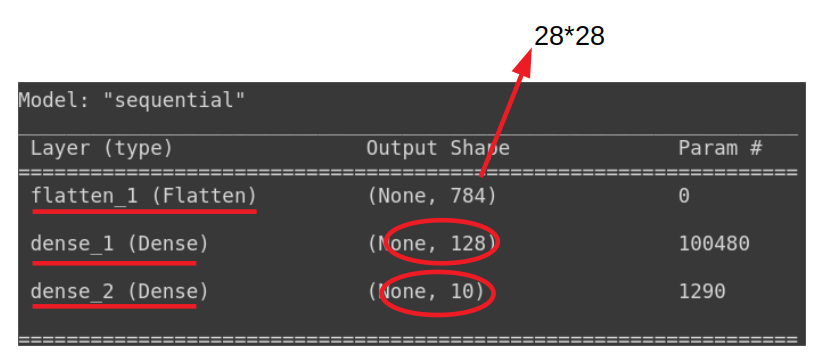

展平層的output shape為784因為28*28<br>
第一層Dense 完全連接層為hiddden layer<br>
第二層Dense 完全連接層為output layer<br>


In [33]:
#訓練方式
#以 Sequential.compile(), 設定模型訓練方式
#Compilation:
#Before training a model, you need to configure the learning process, 
#which is done via the compile method. It receives three arguments:
# 1.An optimizer.      (設定訓練時的優化方法, 如adam)
# 2.A loss function.   (設定損失函數, 如 cross_entropy)
# 3.A list of metrics. (設定評估模型的方式, 如 accuracy)
model.compile(loss = 'categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

In [34]:
# 開始訓練
# epochs迭代
# batch_size經過多少tensor之後反向傳播回去更改一次權重值
history = model.fit(x_train_normal , y_train_onehot , validation_split = 0.2 , epochs= 10 , batch_size= 128 , verbose=2)

Epoch 1/10
375/375 - 2s - loss: 0.3957 - accuracy: 0.8931 - val_loss: 0.2145 - val_accuracy: 0.9391 - 2s/epoch - 5ms/step
Epoch 2/10
375/375 - 1s - loss: 0.1842 - accuracy: 0.9481 - val_loss: 0.1678 - val_accuracy: 0.9514 - 1s/epoch - 3ms/step
Epoch 3/10
375/375 - 1s - loss: 0.1349 - accuracy: 0.9611 - val_loss: 0.1313 - val_accuracy: 0.9639 - 1s/epoch - 3ms/step
Epoch 4/10
375/375 - 1s - loss: 0.1029 - accuracy: 0.9707 - val_loss: 0.1172 - val_accuracy: 0.9654 - 1s/epoch - 3ms/step
Epoch 5/10
375/375 - 1s - loss: 0.0836 - accuracy: 0.9763 - val_loss: 0.1048 - val_accuracy: 0.9696 - 1s/epoch - 3ms/step
Epoch 6/10
375/375 - 1s - loss: 0.0687 - accuracy: 0.9812 - val_loss: 0.1008 - val_accuracy: 0.9721 - 1s/epoch - 3ms/step
Epoch 7/10
375/375 - 1s - loss: 0.0571 - accuracy: 0.9842 - val_loss: 0.0959 - val_accuracy: 0.9711 - 1s/epoch - 3ms/step
Epoch 8/10
375/375 - 1s - loss: 0.0488 - accuracy: 0.9870 - val_loss: 0.0931 - val_accuracy: 0.9728 - 1s/epoch - 3ms/step
Epoch 9/10
375/375 - 1s 

In [35]:
model.evaluate(x_test_normal , y_test_onehot)

313/313 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9766


[0.07914438843727112, 0.9765999913215637]

In [36]:
import matplotlib.pyplot as plt

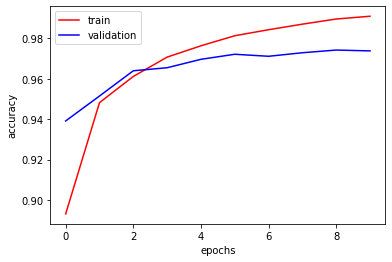

In [46]:
# 畫圖檢視準確率
# 紅色為訓練的準確
# 藍紫色為驗證的準確度
plt.plot(history.history['accuracy'] , '-r')
plt.plot(history.history['val_accuracy'] , '-b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()


In [49]:
# 預測
prediction = model.predict(x_test_normal)

In [50]:
prediction

array([[3.1185564e-07, 8.9400514e-09, 2.4964018e-05, ..., 9.9954599e-01,
        7.8884318e-07, 1.1902378e-06],
       [3.6935461e-08, 7.2767849e-05, 9.9992180e-01, ..., 6.0011932e-14,
        9.9948728e-08, 3.2783875e-14],
       [1.5247646e-06, 9.9867767e-01, 1.2284589e-04, ..., 6.8110455e-04,
        2.9457168e-04, 3.5129015e-06],
       ...,
       [1.3939141e-12, 4.2218590e-12, 1.1228355e-11, ..., 6.4059947e-07,
        2.6310516e-07, 3.9727142e-06],
       [4.0145255e-11, 1.1177791e-10, 2.7606617e-11, ..., 3.7485140e-11,
        2.5128853e-07, 6.1250054e-11],
       [7.9002035e-08, 6.8392067e-12, 6.7960064e-09, ..., 3.0621426e-13,
        1.5431245e-11, 1.6594955e-11]], dtype=float32)

In [60]:
pre = [np.argmax(i) for i in prediction]

In [62]:
# 預測的第一筆資料
pre[0]

7

In [63]:
# y_test的第一筆資料
y_test[0]

7

In [67]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf() 
    fig.set_size_inches(12,14)      #設定顯示圖形為12"x14" 
    if num>25: num=25               #如果顯示筆數大於25,就設定為25
    for i in range(0,num):          #畫出num個數字圖形
        ax=plt.subplot(5,5,1+i)     #subplot(nrows, ncols, plot_number), plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols.
        ax.imshow(images[idx], cmap='binary') #show 第 [idx] 個 images, colormap='binary'
        title="label="+str(labels[idx])       #此一subplot抬頭為對應的label值
        if len(prediction)>0:                      #如果呼叫此函數時,有給定預測值prediction (a list)
            title+=",predit="+str(prediction[idx]) #   在抬頭加上對應的預測值 prediction[idx]
        
        ax.set_title(title,fontsize=10)  #設定subplot ax 的 title
        ax.set_xticks([]);ax.set_yticks([]) #set_xticks(ticks, minor=False), Set the x ticks with list of ticks, 此處[]為不設定刻度
        idx+=1
    plt.show()  

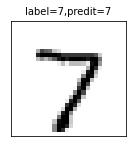

In [68]:
plot_images_labels_prediction(x_test,y_test,pre,0,1)